In this notebook I am showing the basics of the tensorflow by following the link
https://medium.com/analytics-vidhya/series-learning-tensorflow-the-easy-way-dcc5be834d74

## Incresing width to make it fit to the browser for better view

In [1]:
from IPython.core.display import HTML,display
display(HTML('<style>.container {width:100%;} </style>'))

## Importents imports 

In [28]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline 
pd.set_option('display.Max_Columns',None)

In [6]:
tf.__version__

'1.14.0'

In [7]:
first_string=tf.constant("Analytic")
second_string=tf.constant("vidhya")

In [8]:
type(first_string)

tensorflow.python.framework.ops.Tensor

In [9]:
combined_string=first_string+second_string
type(combined_string),combined_string

(tensorflow.python.framework.ops.Tensor,
 <tf.Tensor 'add:0' shape=() dtype=string>)

In [11]:
with tf.Session() as sess:
    result=sess.run(combined_string)
    print(result)

b'Analyticvidhya'


In [14]:
Matrix_1 = tf.constant([ [1,3],
                          [2,6]])
Matrix_2 = tf.constant([ [13,26],
                          [23,52]])
print("The Shape of Matrix 1 is {} and of Matrix 2 is {}".format(Matrix_1.get_shape(), Matrix_2.get_shape()))

MatMul=tf.matmul(Matrix_1,Matrix_2)
with tf.Session() as sess:
    print(sess.run(MatMul))

The Shape of Matrix 1 is (2, 2) and of Matrix 2 is (2, 2)
[[ 82 182]
 [164 364]]


In [15]:
first_var=tf.random_uniform((4,4),0,1)
second_var=tf.ones((4,4))

In [16]:
first_var

<tf.Tensor 'random_uniform:0' shape=(4, 4) dtype=float32>

In [17]:
init=tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    init.run()
    print(first_var.eval())
    print(second_var.eval())

[[0.01234591 0.06573009 0.07740152 0.28354025]
 [0.2575531  0.14338112 0.05079341 0.7872549 ]
 [0.9107754  0.4730891  0.14798069 0.37655926]
 [0.18270874 0.00640452 0.0955255  0.9090686 ]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [20]:
integer_placeholder=tf.placeholder(tf.int32)
float_placeholder=tf.placeholder(tf.float32)
train_data=tf.placeholder(dtype=tf.float32,shape=(None, 5))
test_data=tf.placeholder(dtype=tf.float32,shape=(None, 5))

In [21]:
np.random.seed(13)
tf.set_random_seed(13)

In [22]:
random_data=np.random.uniform(0,100,(5,5))
random_weights=np.random.uniform(0,100,(5,1))
random_data,random_weights

(array([[77.77024106, 23.754122  , 82.42785327, 96.5749198 , 97.26011139],
        [45.34492474, 60.90424628, 77.55265146, 64.16133448, 72.20182295],
        [ 3.50365241, 29.84494709,  5.85124919, 85.70609426, 37.28540279],
        [67.98479516, 25.62799493, 34.75812152,  0.94127701, 35.83337827],
        [94.90941817, 21.78990091, 31.93913664, 91.7772386 ,  3.19036664]]),
 array([[ 6.5084537 ],
        [62.98289991],
        [87.38134433],
        [ 0.87157323],
        [74.6577237 ]]))

In [23]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
add_operation=a+b
multiply_operation=a*b

In [25]:
with tf.Session() as sess:
    add_result=sess.run(add_operation,
                        feed_dict={
                            a:random_data,
                            b:random_weights
                        })
    multiply_result=sess.run(multiply_operation,
                            feed_dict={
                                a:random_data,
                                b:random_weights
                            })
    print(add_result)
    print(multiply_result)

[[ 84.278694   30.262575   88.93631   103.083374  103.76856  ]
 [108.32782   123.887146  140.53555   127.144226  135.18472  ]
 [ 90.885     117.226295   93.2326    173.08743   124.66675  ]
 [ 68.85637    26.499567   35.629696    1.8128502  36.704952 ]
 [169.56714    96.447624  106.59686   166.43497    77.84809  ]]
[[5.0616403e+02 1.5460260e+02 5.3647791e+02 6.2855341e+02 6.3301294e+02]
 [2.8559548e+03 3.8359260e+03 4.8844907e+03 4.0410667e+03 4.5474800e+03]
 [3.0615387e+02 2.6078918e+03 5.1129004e+02 7.4891138e+03 3.2580488e+03]
 [5.9253727e+01 2.2336674e+01 3.0294247e+01 8.2039183e-01 3.1231413e+01]
 [7.0857207e+03 1.6267844e+03 2.3845032e+03 6.8518794e+03 2.3818552e+02]]


In [75]:
train_df=pd.read_csv('../kaggle intermediate course/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

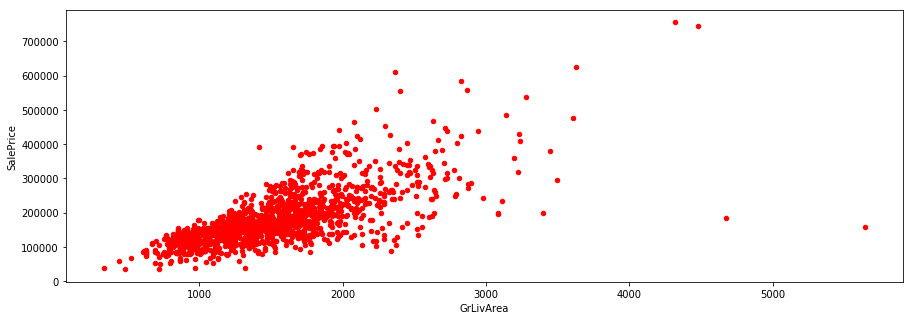

In [77]:
train_df.plot(x='GrLivArea',y='SalePrice',kind='scatter',figsize=(15,5),color='red');

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_df['GrLivArea']=scaler.fit_transform(train_df['GrLivArea'].values.reshape(-1,1))
train_df['SalePrice']=scaler.fit_transform(train_df['SalePrice'].values.reshape(-1,1))

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train['GrLivArea'] = scaler.fit_transform(train['GrLivArea'].reshape(-1, 1))
# train['SalePrice'] = scaler.fit_transform(train['SalePrice'].reshape(-1, 1))

In [86]:
m=tf.Variable(0.0)
b=tf.Variable(0.0)

In [87]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])
y_model=m*xph+b

error=tf.reduce_sum(tf.square(yph-y_model))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [88]:
init=tf.global_variables_initializer()
batch_size=300
with tf.Session() as sess:
    sess.run(init)
    epochs=1000
    for i in range(epochs):
        rand_ind=np.random.randint(len(train_df),size=batch_size)
        feed={
            xph:train_df['GrLivArea'][rand_ind].values,
            yph:train_df['SalePrice'][rand_ind].values
        }
        sess.run(train,feed_dict=feed)
        model_m,model_b=sess.run([m,b])

In [89]:
print("The trained weight for m is : {m}".format(m=model_m))
print("The trained weight for b is : {b}".format(b=model_b))

The trained weight for m is : 0.7939023375511169
The trained weight for b is : 0.03005378507077694


The trained weight for m is: 0.7939023375511169
The trained weight for b is: 0.03005378507077694
Root mean squared error: 0.07791759845448835


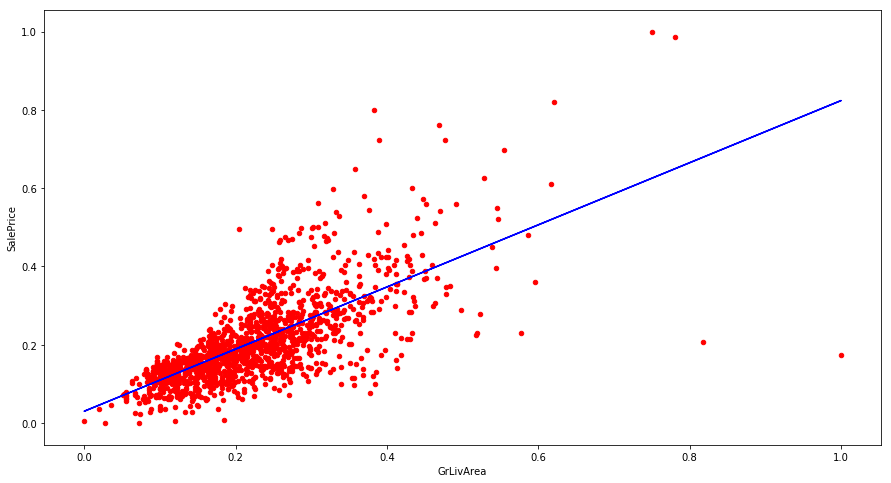

In [90]:
print('The trained weight for m is: {m}'.format(m = model_m))
print('The trained weight for b is: {}'.format(model_b))
y_hat = train_df['GrLivArea'] * model_m + model_b
train_df.plot(kind = 'scatter',
             x = 'GrLivArea',
             y = 'SalePrice',
             color = 'red',
             figsize = (15,8))
plt.plot(train_df['GrLivArea'], y_hat, 'blue')
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(train_df['SalePrice'], y_hat) ** 0.5
print('Root mean squared error:', rmse)